In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.shape

(418, 11)

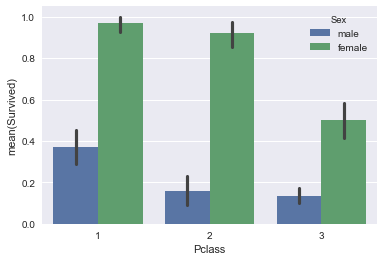

In [7]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df_train)

In [8]:
# To select a subset - all columns containing at least one NaN value:
df_train.loc[:, df_train.isnull().any()]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
5,NaN,NaN,Q
6,54.0,E46,S
7,2.0,NaN,S
8,27.0,NaN,S
9,14.0,NaN,C


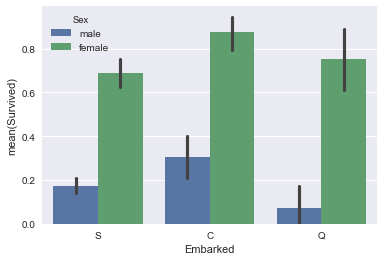

In [9]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=df_train)


In [10]:
df_train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,Youth,1,0,A/5 21171,1,N,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,4,C,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,Youth,0,0,STON/O2. 3101282,1,N,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Youth,1,0,113803,4,C,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,Youth,0,0,373450,2,N,S,Mr.


In [12]:
print df_test.shape
print df_train.shape

(418, 12)
(891, 13)


In [13]:
# Since I need to convert everything to numbers to be able to use my models, 
# I decided to use The LabelEncoder in Scikit-learn to convert each unique string value into a number.
from sklearn import preprocessing
def encode_features(d_train, d_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Name_title']
    df_combined = pd.concat([d_train[features], d_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        d_train[feature] = le.transform(d_train[feature])
        d_test[feature] = le.transform(d_test[feature])
    return d_train, d_test
    
df_train, df_test = encode_features(df_train, df_test)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",1,6,1,0,A/5 21171,0,7,S,19
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,3,2,C,20
2,3,1,3,"Heikkinen, Miss. Laina",0,6,0,0,STON/O2. 3101282,0,7,S,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,6,1,0,113803,3,2,S,20
4,5,0,3,"Allen, Mr. William Henry",1,6,0,0,373450,1,7,S,19


In [14]:
test = df_test.drop(['Name', 'Embarked', 'Ticket'], axis =1)
train = df_train.drop(['Name', 'Embarked', 'Ticket'], axis =1)

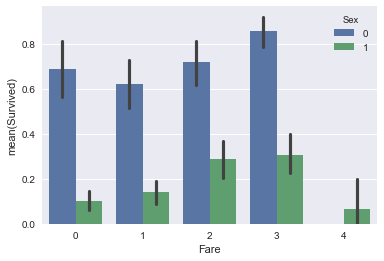

In [15]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=train)

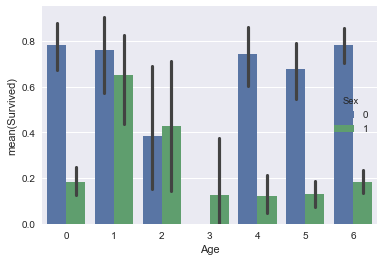

In [16]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train)

In [17]:
print train.shape
print test.shape

(891, 10)
(418, 9)


In [18]:
X = train.drop(['PassengerId', 'Survived'], axis = 1)
y = train['Survived']

In [19]:
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.87317620651


In [20]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Name_title
0,3,1,6,1,0,0,7,19
1,1,0,0,1,0,3,2,20
2,3,0,6,0,0,0,7,16
3,1,0,6,1,0,3,2,20
4,3,1,6,0,0,1,7,19


In [22]:
test[test.columns[1:]].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Name_title
0,3,1,6,0,0,0,7,19
1,3,0,0,1,0,0,7,20
2,2,1,0,0,0,1,7,19
3,3,1,6,0,0,1,7,19
4,3,0,6,1,1,1,7,20


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 23)

In [ ]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

In [ ]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = test.PassengerId

In [ ]:
print ("Predictions are:", predictions[:5])

In [ ]:
submission.shape

In [ ]:
predictions = knn.predict(test[test.columns[1:]])

In [ ]:
submission['Survived'] = predictions
submission.head()

In [ ]:
submission.to_csv('submit_titanic.csv', index=False)